In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

21 13


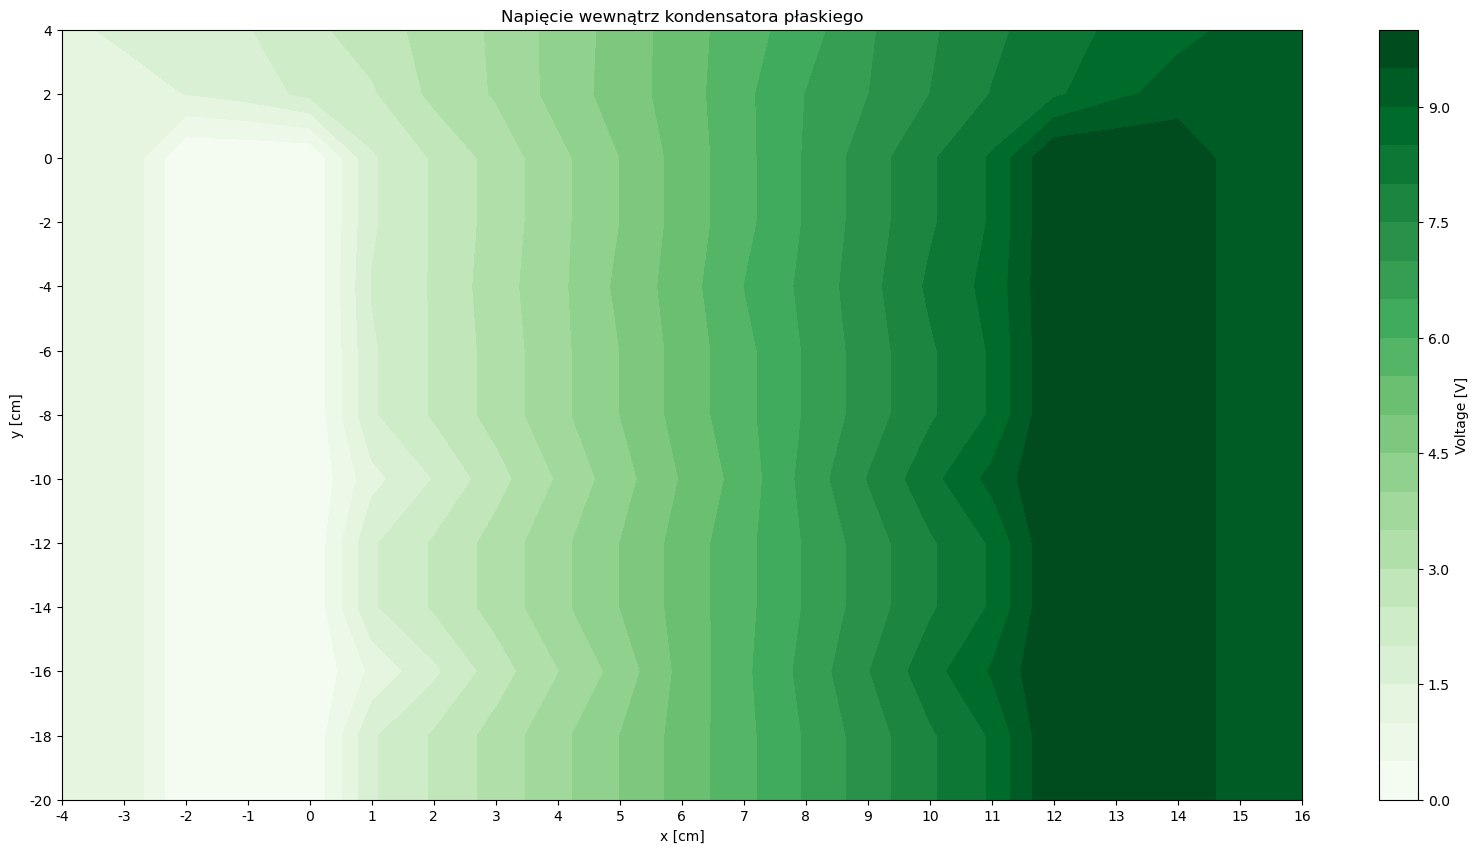

In [85]:
V = pd.read_csv('lab4.csv')
V = V.fillna(V.mean())
V = V.iloc[::-1].reset_index(drop=True)

ys, xs = V.shape
print(xs,ys)

x = np.arange(xs)
y = np.arange(ys)
X, Y = np.meshgrid(x,y)

plt.figure(figsize = (20,10))
plt.contourf(X, Y, V, levels = 20, cmap = 'Greens')
plt.title('Napięcie wewnątrz kondensatora płaskiego')

x_shift = -4
y_shift = -10

plt.xticks(x, x + x_shift)
plt.yticks(y, (y + y_shift)*2)

plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.colorbar(label = 'Voltage [V]')
plt.savefig('Płaski_1.jpg', format='jpg', dpi=300)

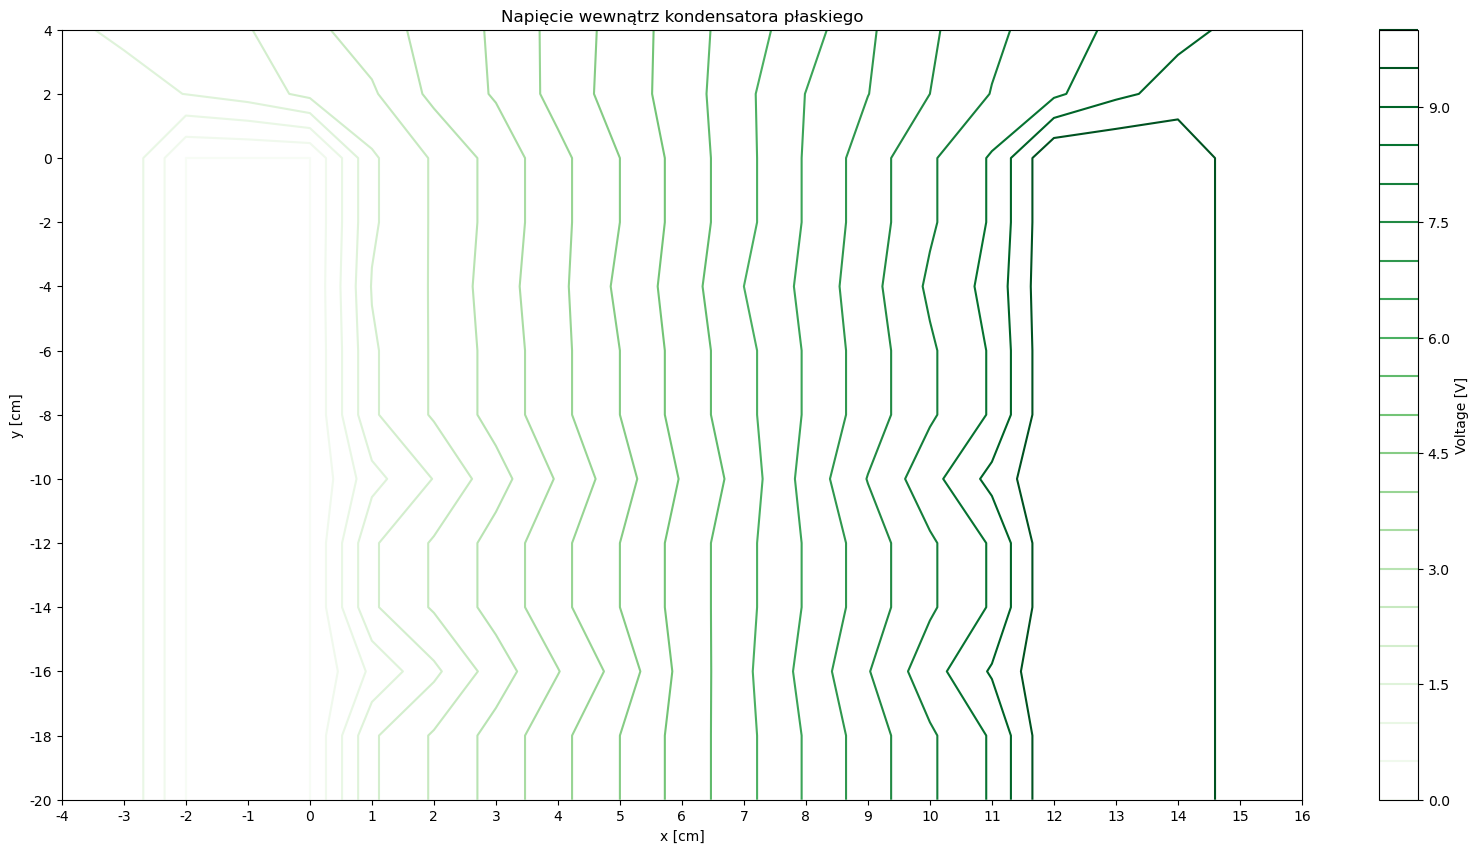

In [86]:
newV = V.iloc[1:-1]
y2, x2 = newV.shape

newX, newY = np.meshgrid(np.arange(x2), np.arange(y2))

plt.figure(figsize = (20,10))
plt.contour(X,Y, V, levels = 20, cmap = 'Greens')
plt.title('Napięcie wewnątrz kondensatora płaskiego')

x_shift = -4
y_shift = -10

plt.xticks(x, x + x_shift)
plt.yticks(y, (y + y_shift)*2)
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.colorbar(label = 'Voltage [V]')
plt.savefig('Płaski_2.jpg', format='jpg', dpi=300)


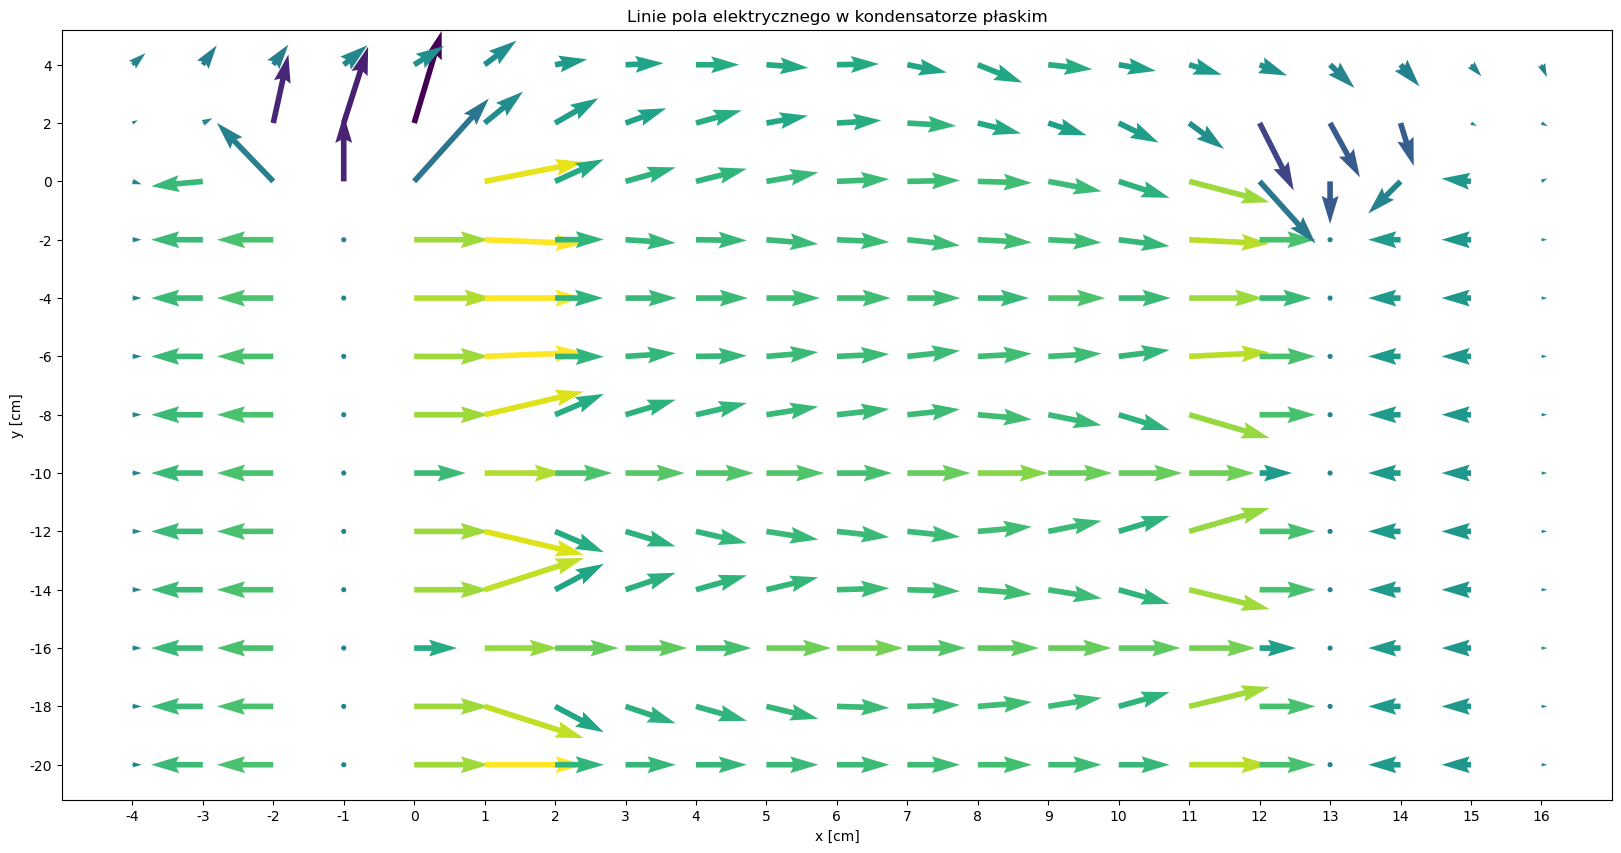

In [87]:
Ey, Ex = np.gradient(V)
fun = np.sin(Ex)**2 + np.cos(Ey)**2
plt.figure(figsize = (20,10))
plt.title('Linie pola elektrycznego w kondensatorze płaskim')

x_shift = -4
y_shift = -10

plt.xticks(x, x + x_shift)
plt.yticks(y, (y + y_shift)*2)
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.quiver(X, Y, Ex, Ey, fun, color = 'green', scale = 20)
plt.savefig('Płaski_vec.jpg', format='jpg', dpi=300)

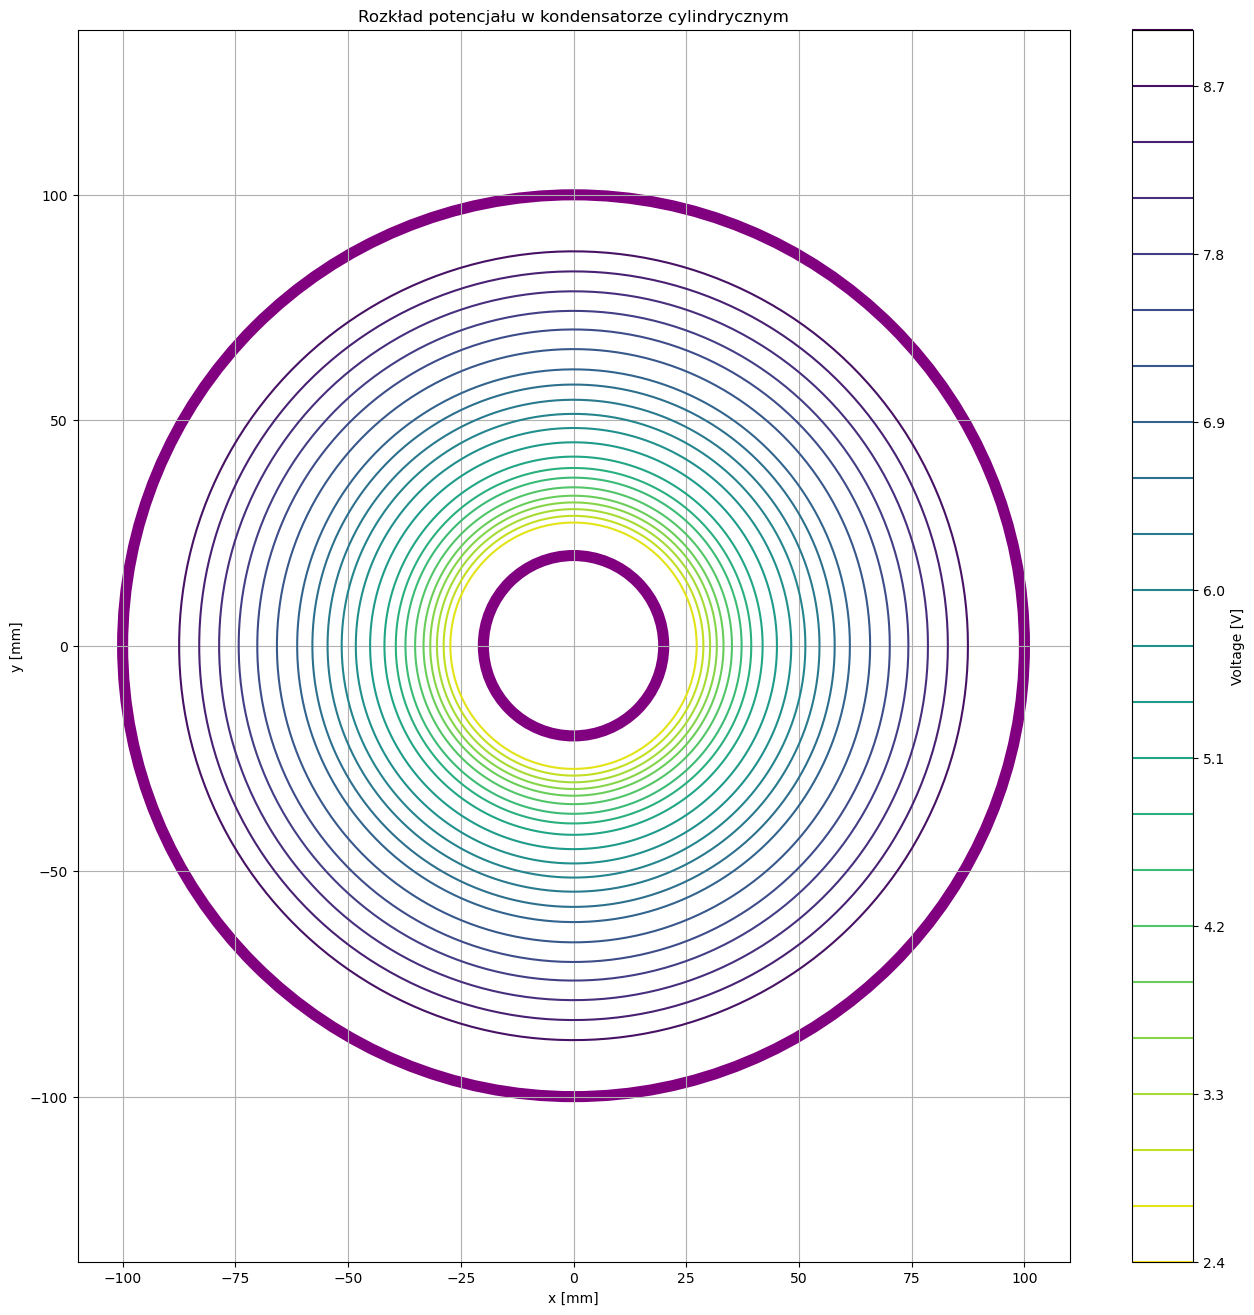

In [88]:
from scipy.interpolate import interp1d
import matplotlib.patches as patches

rw = 20
rz = 100
Vmax = 10

Vs = pd.read_csv('lab4_2.csv', header = None)
first_row = Vs.iloc[0]
second_row = Vs.iloc[1]
third_row = Vs.iloc[2]
n = len(first_row)

V_values = np.array([ (first_row.to_numpy()[i] + second_row.to_numpy()[i] + third_row.to_numpy()[i])/3 for i in range(n)])

r_values = np.array([27,33,40,47,54,61,69,76,83,89])

potential_interp = interp1d(r_values, V_values, kind='cubic', fill_value="extrapolate")

r = np.linspace(r_values.min(),r_values.max(),10)
theta = np.linspace(0, 2*np.pi, 200)
R, Theta = np.meshgrid(r, theta)

V = potential_interp(R)

X = R * np.cos(Theta)
Y = R * np.sin(Theta)


plt.figure(figsize=(16, 16))
contour = plt.contour(X, Y, V, levels=20, cmap='viridis_r')
circle1 = patches.Circle((0, 0), rw, color='purple', fill=False, linestyle='-', linewidth=8)
circle2 = patches.Circle((0, 0), rz, color='purple', fill=False, linestyle='-', linewidth=8)
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)
plt.colorbar(contour, label='Voltage [V]')
plt.title('Rozkład potencjału w kondensatorze cylindrycznym')
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
plt.axis('equal')
plt.grid(True)
plt.savefig('Cylinryczny_1.jpg', format='jpg', dpi=300)
plt.show()

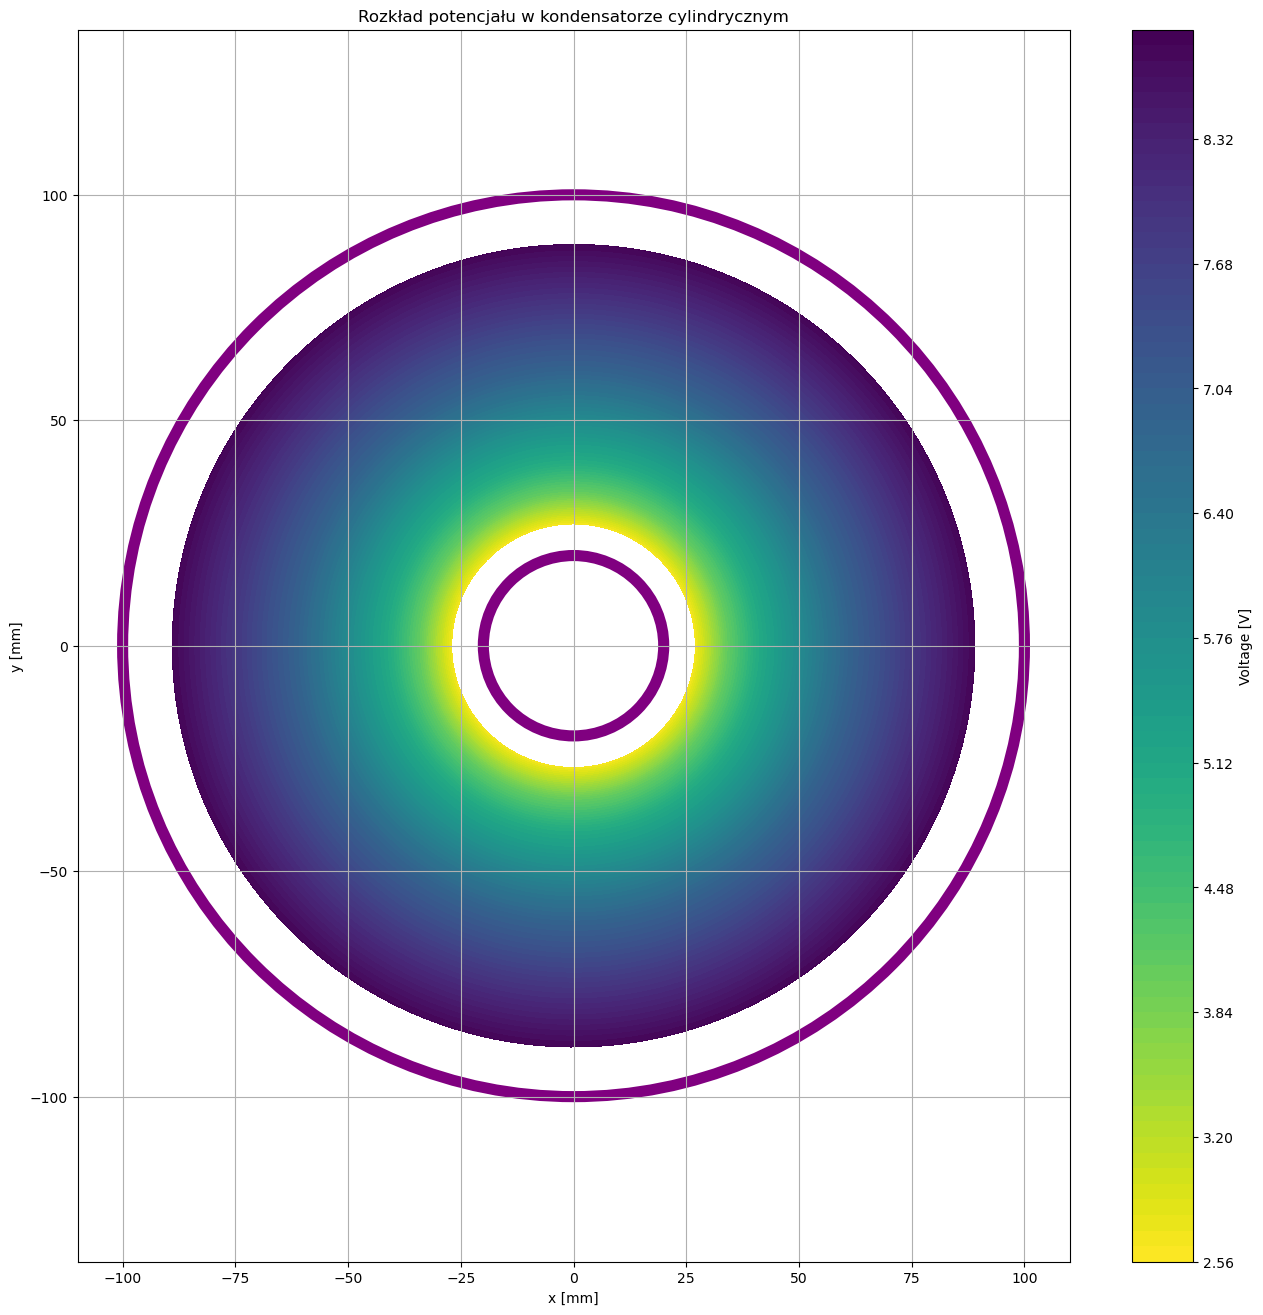

In [89]:
plt.figure(figsize=(16, 16))
contour = plt.contourf(X, Y, V, levels=100, cmap='viridis_r')
circle1 = patches.Circle((0, 0), rw, color='purple', fill=False, linestyle='-', linewidth=8)
circle2 = patches.Circle((0, 0), rz, color='purple', fill=False, linestyle='-', linewidth=8)
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)
plt.colorbar(contour, label='Voltage [V]')
plt.title('Rozkład potencjału w kondensatorze cylindrycznym')
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
plt.axis('equal')
plt.grid(True)
plt.savefig('Cylinryczny_2.jpg', format='jpg', dpi=300)
plt.show()